In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('loan_data-1.csv')

In [3]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

## Checking for any missing values

<AxesSubplot:>

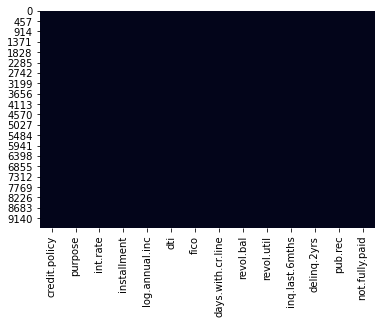

In [6]:
sns.heatmap(data.isnull(), cbar=False)

In [7]:
data.isna().any().any()

False

In [8]:
data.loc[:, data.isnull().any()].columns

Index([], dtype='object')

In [9]:
len(data[data.duplicated()])
# total number of duplicate values in the "data"

0

## Statistical Summary

In [10]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Visualizing the relationships

### Pairplot

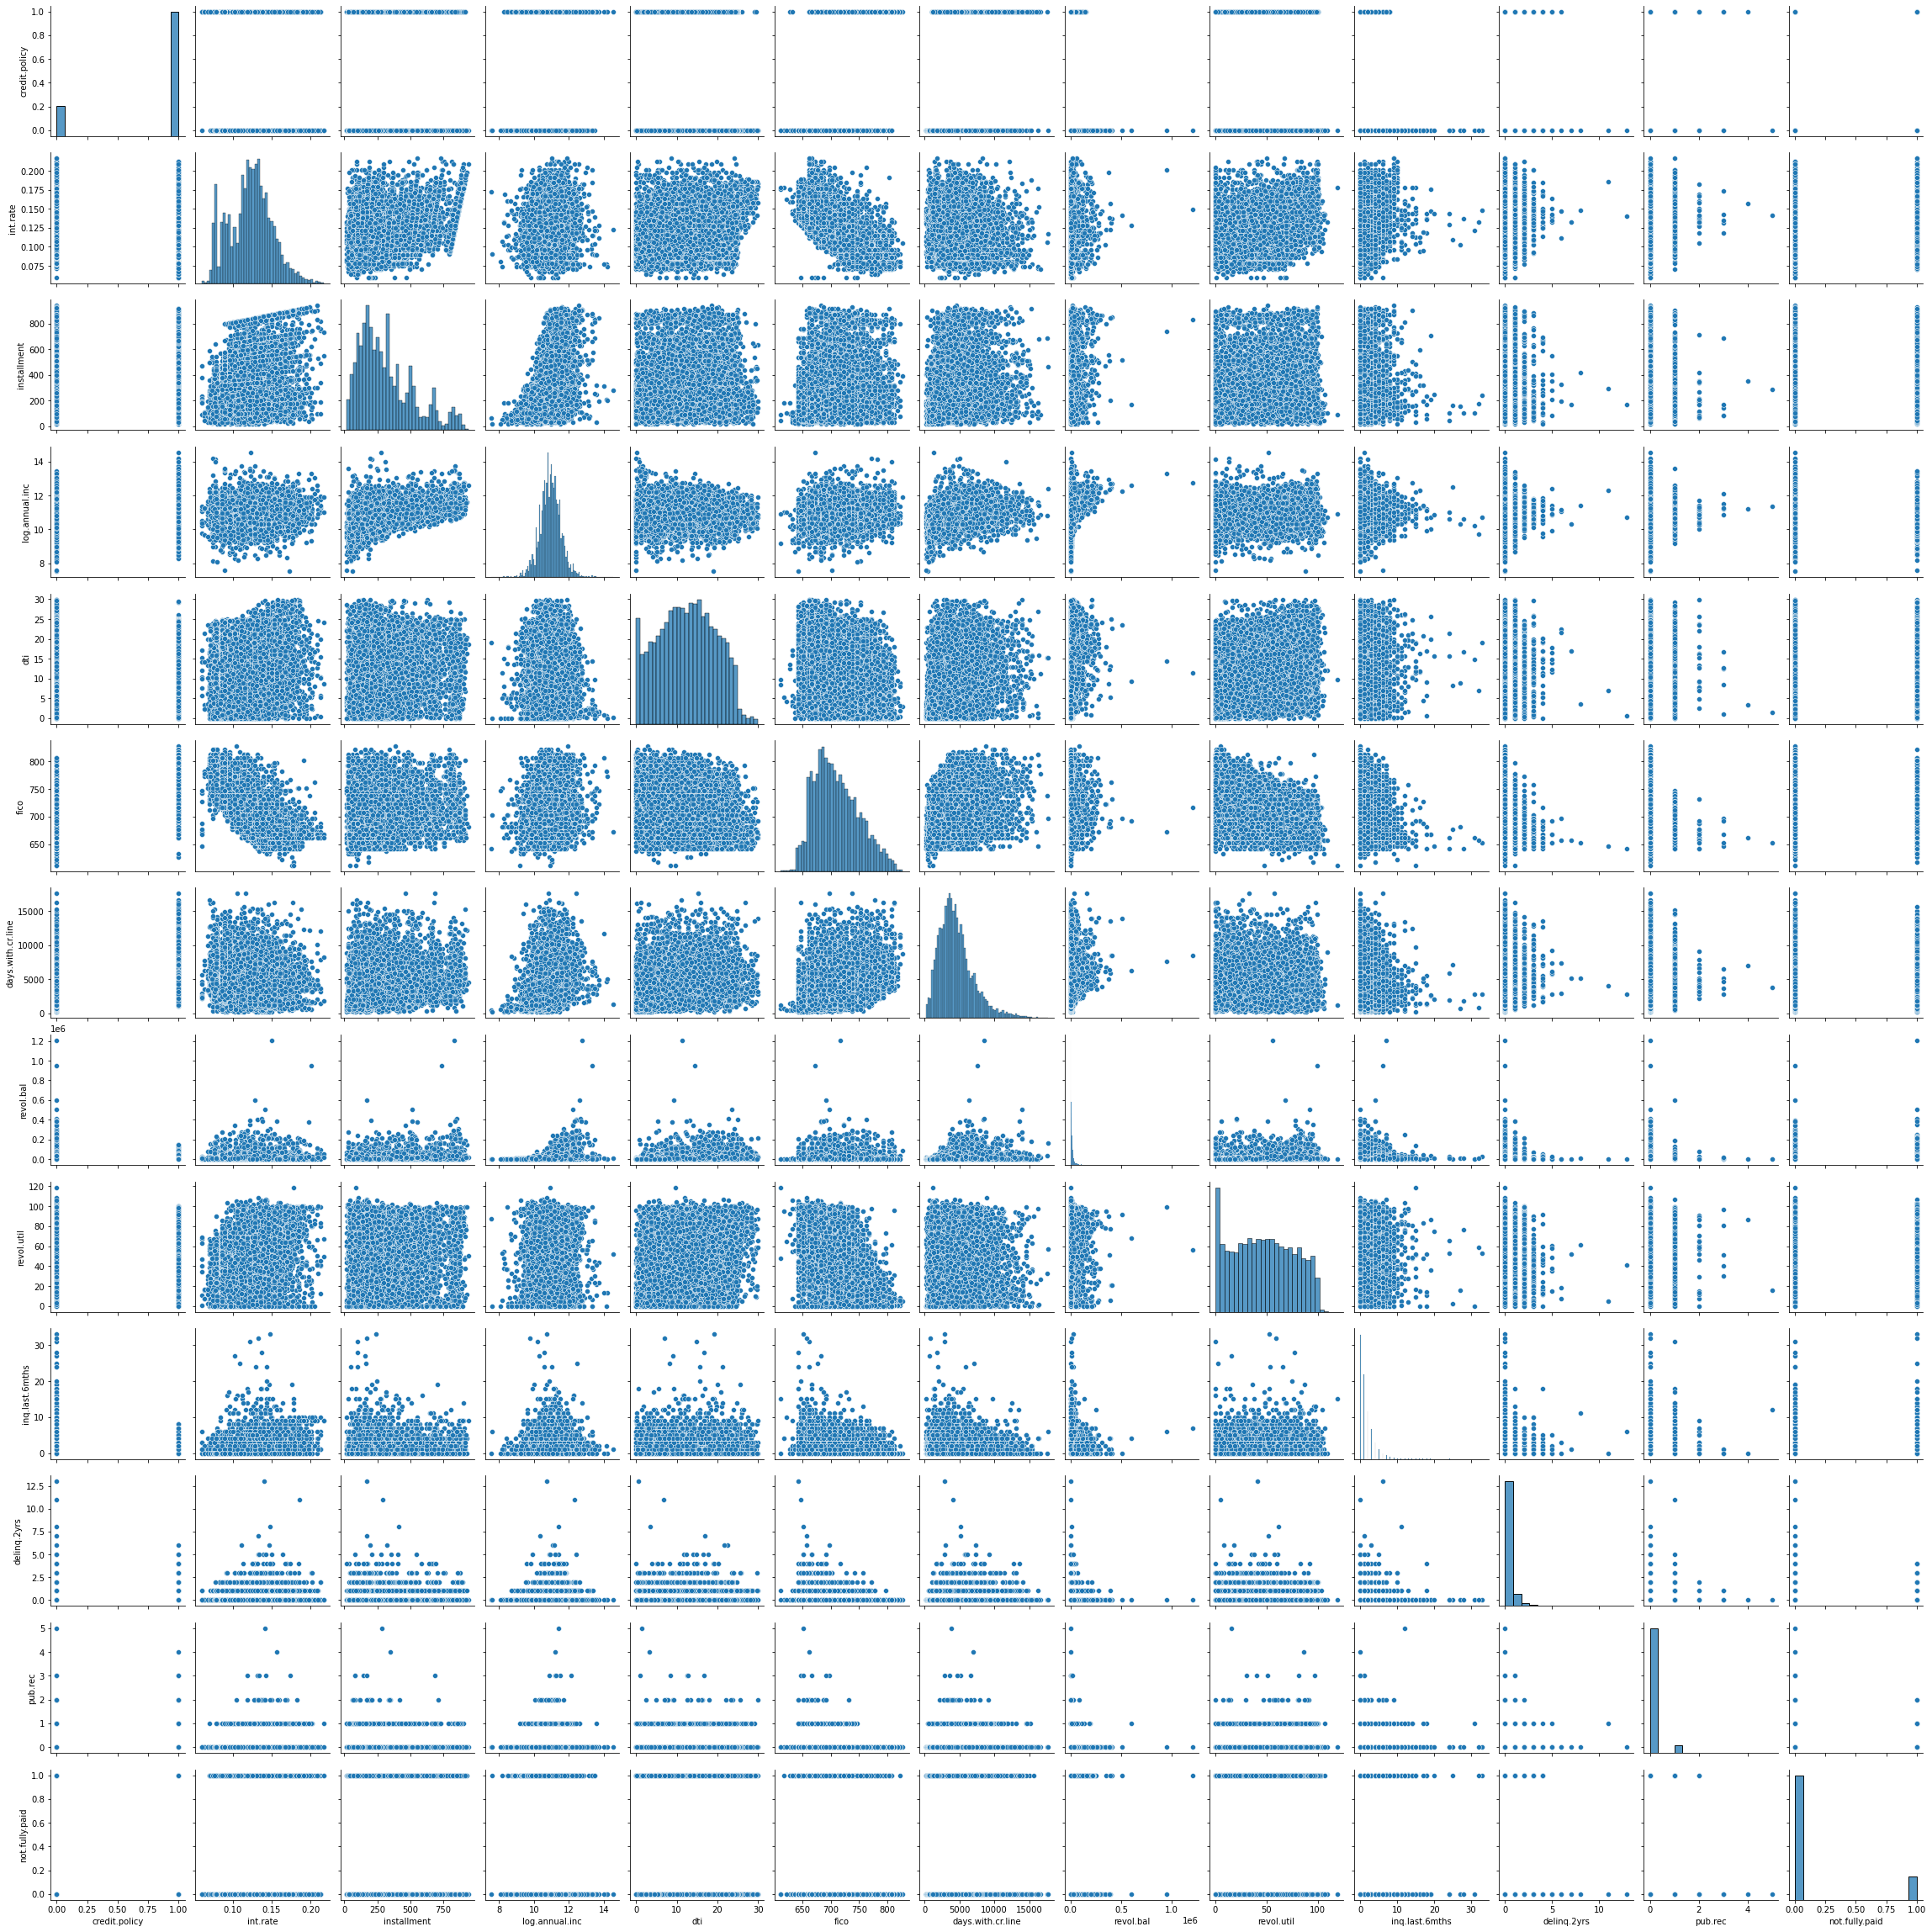

In [11]:
sns.pairplot(data)

### Checking corelation

<AxesSubplot:>

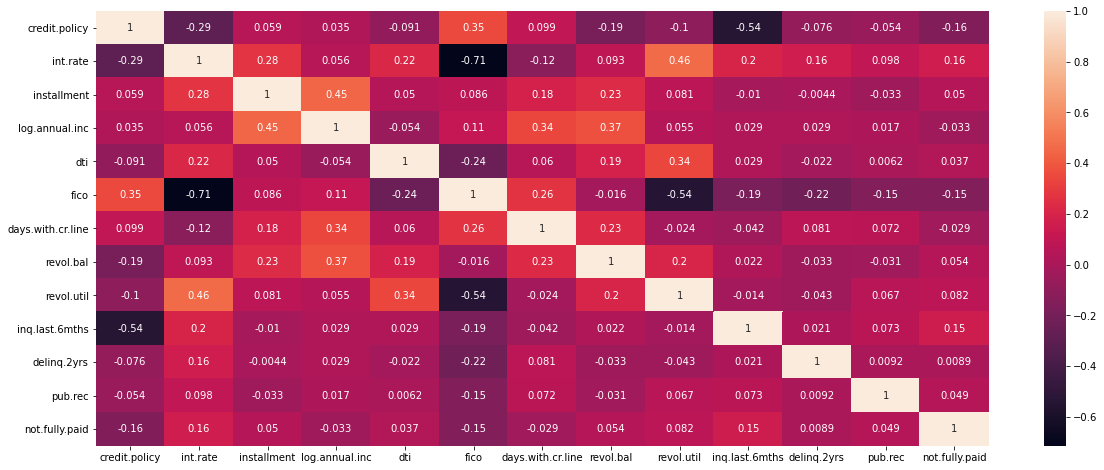

In [12]:
corelation = data.corr()
plt.rcParams['figure.figsize'] = [20,8]
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels= corelation.columns,annot = True)

### Countplot

<AxesSubplot:xlabel='purpose', ylabel='count'>

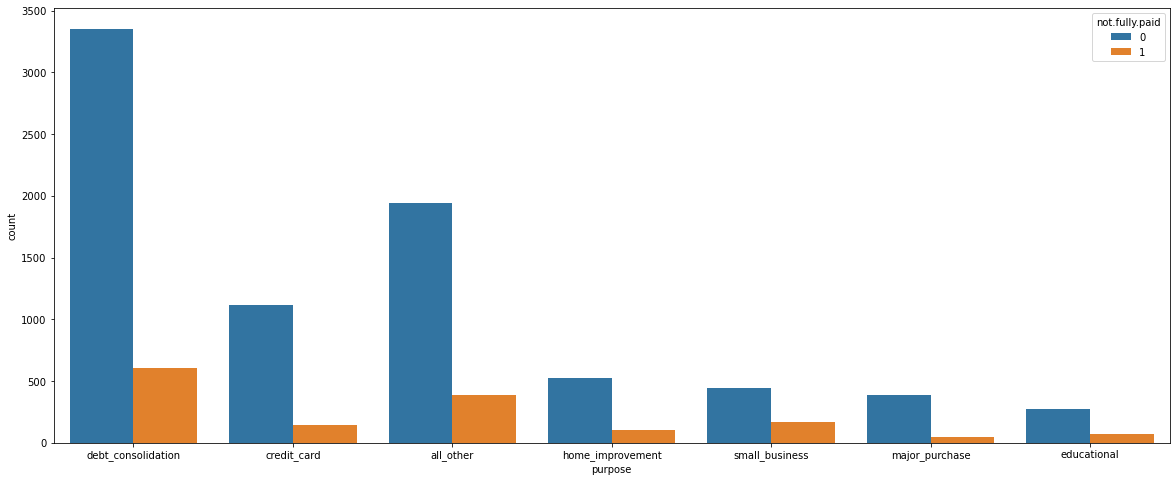

In [13]:
sns.countplot(data = data, x = data["purpose"],hue = data["not.fully.paid"])

## Split the data

In [14]:
data = pd.get_dummies(data, columns = ['purpose'],drop_first = True)

In [15]:
data.columns

Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')

In [16]:
x = data.loc[:, data.columns != "not.fully.paid"].values
y = data.loc[:, data.columns == "not.fully.paid"].values

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,stratify = y)

## Model Implementation

In [30]:
from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)

In [31]:
clf_svm = SVC(random_state = 42)
clf_svm.fit(x_train,y_train)

SVC(random_state=42)

In [32]:
y_pred=clf_svm.predict(x_test)

In [33]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8392484342379958


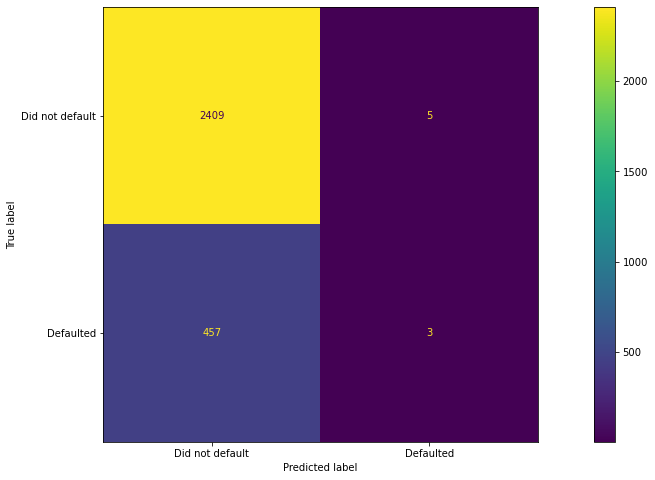

In [34]:
plot_confusion_matrix(clf_svm,x_test,y_test,values_format = 'd',display_labels=["Did not default","Defaulted"])

In [35]:
param_grid = [{'C':[0.5,1,10],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}]
optimal_params = GridSearchCV(SVC( ),param_grid,cv=5,scoring = 'accuracy')

In [36]:
optimal_params.fit(x_train,y_train)
print(optimal_params.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


## Final model

In [37]:
clf_svm = SVC(random_state = 42, C = 1, gamma = 1)
clf_svm.fit(x_train,y_train)

SVC(C=1, gamma=1, random_state=42)

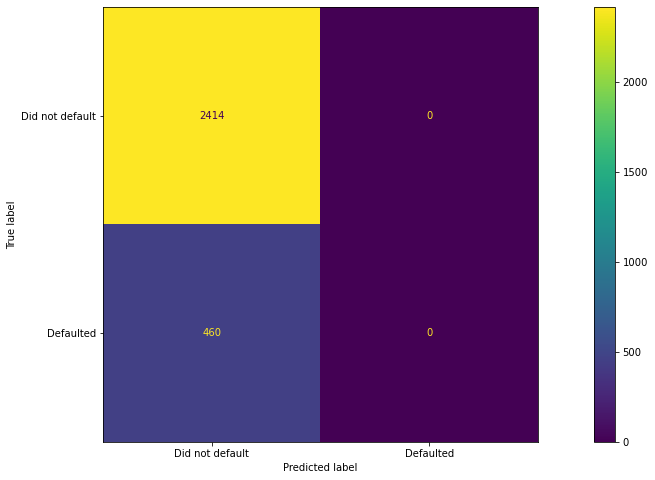

In [38]:
plot_confusion_matrix(clf_svm, x_test,y_test,values_format = 'd',display_labels = ['Did not default', "Defaulted"])

In [39]:
y_pred=clf_svm.predict(x_test)

In [40]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.8399443284620738


## Classification report

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2414
           1       0.00      0.00      0.00       460

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.71      0.84      0.77      2874

